In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(pd.__version__)

1.5.3


In [3]:
cust_service= pd.read_csv('C:/Users/Admin/Desktop/Python_Simplilearn/Project 1/Project_Two_Dataset/311_Service_Requests_from_2010_to_Present.csv')

In [4]:
cust_service.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
cust_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [6]:
cust_service.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [7]:
type(cust_service)

pandas.core.frame.DataFrame

In [8]:
######### Q1. Identify the shape and variables with null values

In [9]:
cust_service.shape ##### To identify the shape of dataset

(364558, 53)

In [10]:
cust_service.isnull().any() ##Variables with null values and 0 null values

Unique Key                        False
Created Date                      False
Closed Date                        True
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                       True
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                           True
Resolution Description            False
Resolution Action Updated Date     True
Community Board                   False
Borough                           False


In [11]:
cust_service.isna().sum() ###### Sum of null values each column have

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

##### Q2.  Perform basic data exploratory analysis:
                Utilize missing value treatment
                Analyze the date column and remove the entries if it has an incorrect timeline
                Draw a frequency plot for city-wise complaints
                Draw scatter and hexbin plots for complaint concentration across Brooklyn



In [12]:
cust_service.drop(['School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction', 'Ferry Terminal Name'], axis=1, inplace=True)

In [13]:
cust_service.shape  ### Columns having all null values have been removed through the above code.

(364558, 42)

In [14]:
cust_service.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [15]:
cust_service['Created Date'].isna().sum()       ### There is no missing values in created date column.

0

In [16]:
cust_service['Closed Date'].isna().sum()

2381

In [17]:
cust_service.dropna(subset=['Closed Date'], axis=0, inplace=True)  ## null values have been removed

In [18]:
cust_service['Closed Date'].isna().sum() ### No null value is left in this column

0

In [19]:
cust_service.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [20]:
cust_service['City'].value_counts()

BROOKLYN               118849
NEW YORK                77289
BRONX                   49166
STATEN ISLAND           15335
JAMAICA                  8930
ASTORIA                  7991
FLUSHING                 7486
RIDGEWOOD                6391
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3557
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3117
WOODHAVEN                3102
LONG ISLAND CITY         3027
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2333
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2105
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT ALBA

<Axes: title={'center': 'Citywise complaints'}, xlabel='City', ylabel='No. of complaints'>

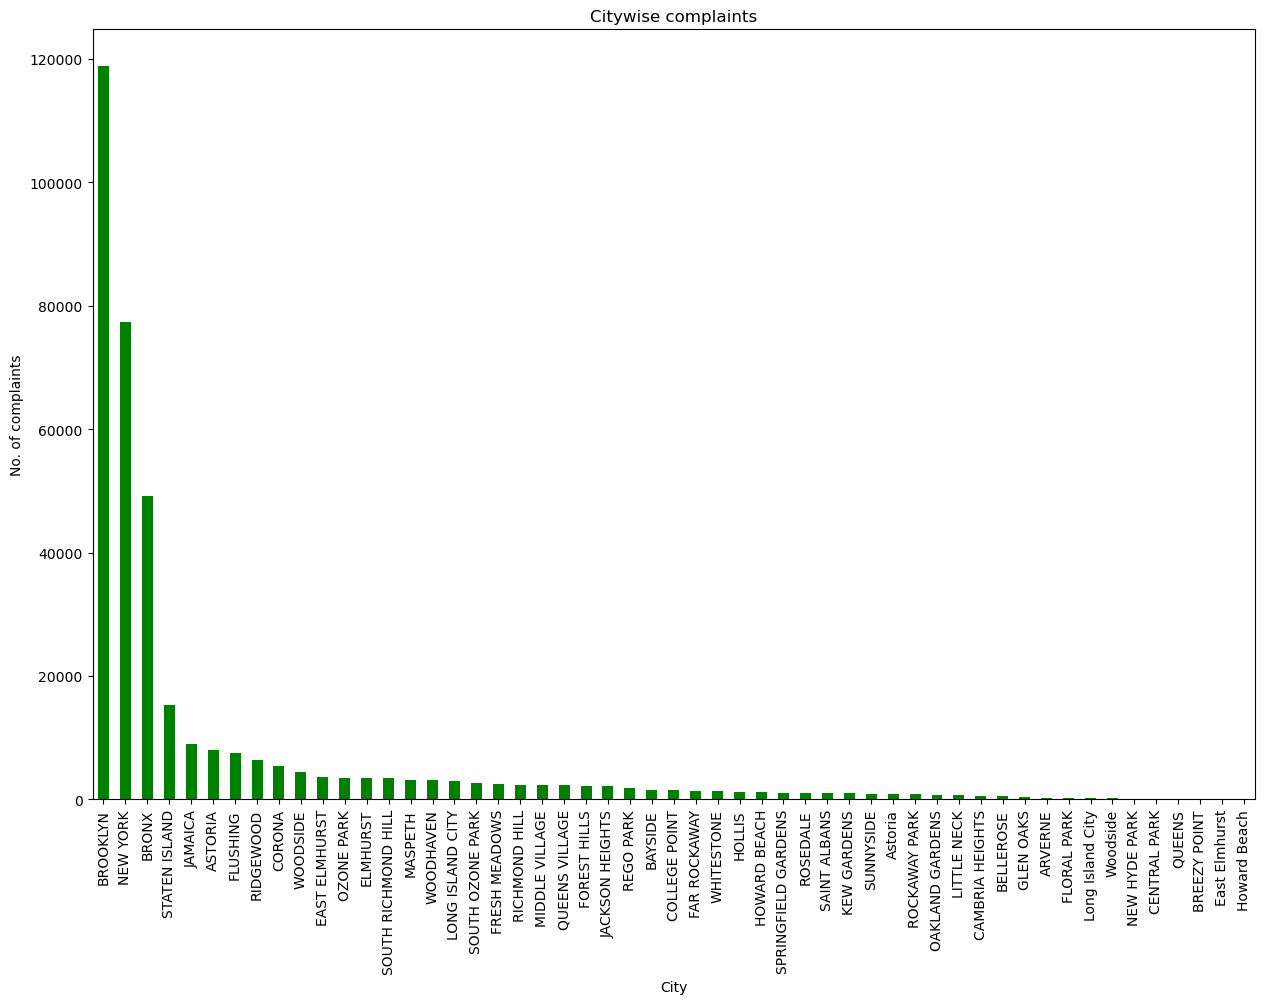

In [21]:
####Frequency Plot for citywise complaints
plt.figure(figsize=(15,10))
cust_service['City'].value_counts().plot(kind='bar', color='green',title='Citywise complaints', xlabel='City',ylabel='No. of complaints')

The above plot shows that city Brooklyn has highest number of complaints.

In [22]:
City_Brooklyn= cust_service[cust_service['City']=='BROOKLYN']
City_Brooklyn.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
5,32306554,12/31/2015 11:56:30 PM,01/01/2016 01:50:11 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
9,32308391,12/31/2015 11:53:58 PM,01/01/2016 01:17:40 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"
13,32305074,12/31/2015 11:47:58 PM,01/01/2016 08:18:47 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)"
17,32310273,12/31/2015 11:44:52 PM,01/01/2016 12:36:10 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)"
18,32306617,12/31/2015 11:40:59 PM,01/01/2016 02:37:28 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)"


In [23]:
Complaints= City_Brooklyn['Complaint Type'].value_counts()
Complaints

Blocked Driveway             36445
Illegal Parking              33532
Noise - Street/Sidewalk      13982
Noise - Commercial           13855
Derelict Vehicle              6257
Noise - Vehicle               5965
Animal Abuse                  3191
Noise - Park                  1575
Traffic                       1258
Homeless Encampment            948
Vending                        575
Noise - House of Worship       389
Drinking                       291
Urinating in Public            155
Bike/Roller/Skate Chronic      124
Disorderly Youth                79
Illegal Fireworks               61
Graffiti                        60
Posting Advertisement           58
Panhandling                     49
Name: Complaint Type, dtype: int64

<Axes: title={'center': 'Complaints in Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

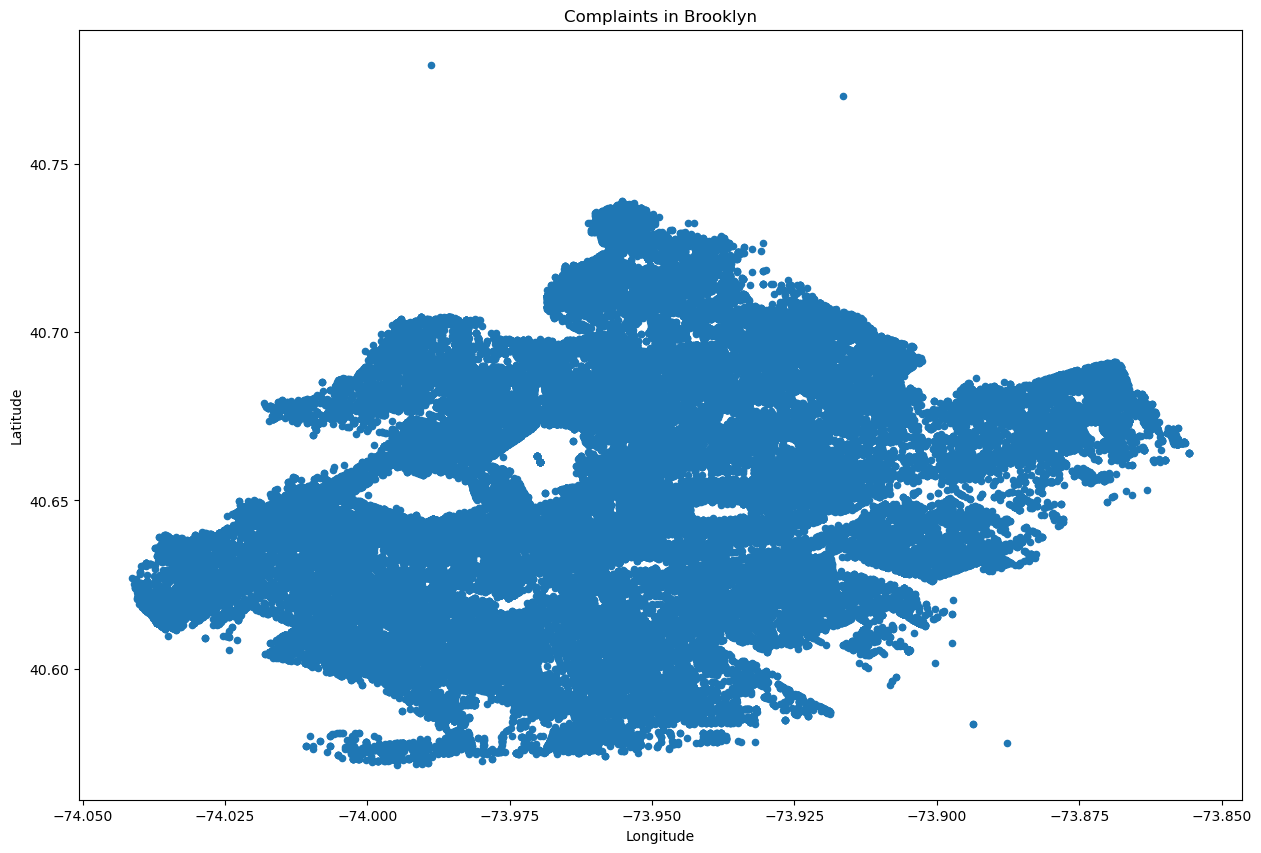

In [24]:
###Scatter plot for concentration on complaints across Brooklyn
City_Brooklyn.plot(kind='scatter',x='Longitude', y='Latitude', figsize=(15,10), title='Complaints in Brooklyn')

<Axes: title={'center': 'Complaints across Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

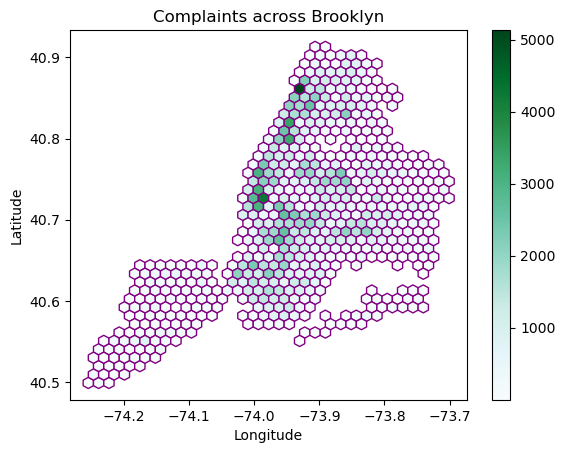

In [25]:
#### Hexbin plot for concentration on complaints across Brooklyn
cust_service.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=35,color='purple', mincnt=1,title='Complaints across Brooklyn')

##### 3. Find major types of complaints:
            Plot a bar graph of count vs. complaint types
            Find the top 10 types of complaints
            Display the types of complaints in each city in a separate dataset



In [26]:
cust_service['Complaint Type'].value_counts()

Blocked Driveway             100624
Illegal Parking               91716
Noise - Street/Sidewalk       51139
Noise - Commercial            43751
Derelict Vehicle              21518
Noise - Vehicle               19301
Animal Abuse                  10530
Traffic                        5196
Homeless Encampment            4879
Vending                        4185
Noise - Park                   4089
Drinking                       1404
Noise - House of Worship       1068
Posting Advertisement           679
Urinating in Public             641
Bike/Roller/Skate Chronic       475
Panhandling                     325
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Animal in a Park                  1
Name: Complaint Type, dtype: int64

<Axes: title={'center': 'Complaints across city'}, xlabel='Complaint Types', ylabel='No. of complaints'>

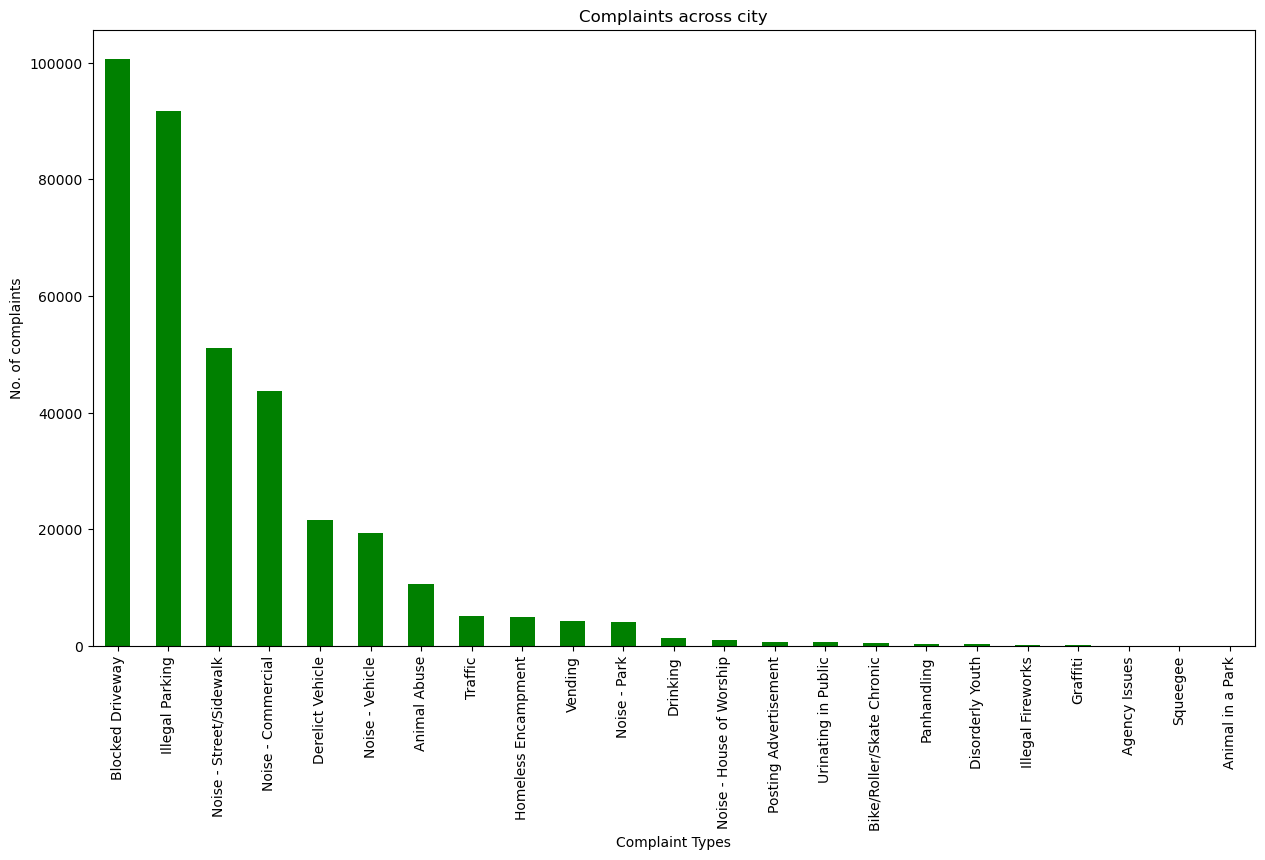

In [27]:
#### Bar plot showing complaints and their count
plt.figure(figsize=(15,8))
cust_service['Complaint Type'].value_counts().plot(kind='bar', color='green',xlabel='Complaint Types', ylabel='No. of complaints', title= 'Complaints across city')

The above plot shows that Blocked Driveaway is the major complaint across the area. 

In [28]:
####Top 10 complaints
Top_complaints= cust_service['Complaint Type'].value_counts().nlargest(n=10)
Top_complaints

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64

<Axes: title={'center': 'Top 10 Complaints'}, xlabel='Types of complaints', ylabel='No. of Complaints'>

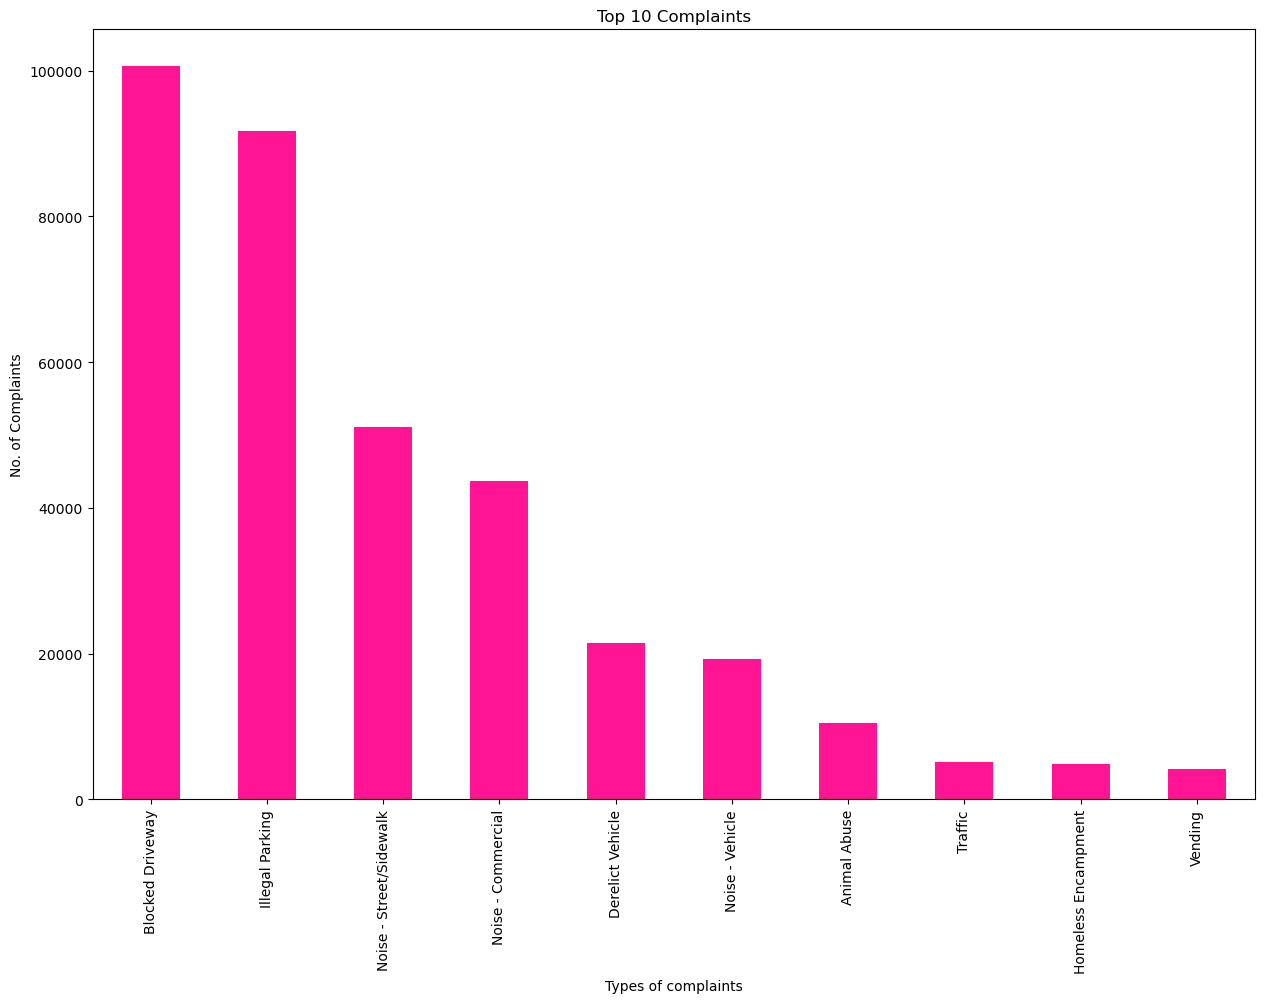

In [29]:
Top_complaints.plot(kind='bar', figsize=(15,10), color='deeppink', xlabel='Types of complaints', ylabel='No. of Complaints', title='Top 10 Complaints')

In [30]:
####types of complaints in each city in a separate dataset

Citywisecomplaints= cust_service.groupby(['City', 'Complaint Type']).size()
citywise_complaints= pd.DataFrame({'Count': Citywisecomplaints}).reset_index()
citywise_complaints

,City,Complaint Type,Count
0,ARVERNE,Animal Abuse,46
1,ARVERNE,Blocked Driveway,50
2,ARVERNE,Derelict Vehicle,32
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1
...,...,...,...
772,Woodside,Blocked Driveway,27
773,Woodside,Derelict Vehicle,8
774,Woodside,Illegal Parking,124
775,Woodside,Noise - Commercial,2


###### 4. Visualize the major types of complaints in each city



In [31]:
top10cities= cust_service['City'].value_counts().head(10).index.to_list()
top10= cust_service[cust_service['City'].isin(top10cities)]
topcities= pd.crosstab(top10['City'], top10['Complaint Type'])

<Axes: title={'center': 'Complaints per city'}, xlabel='City'>

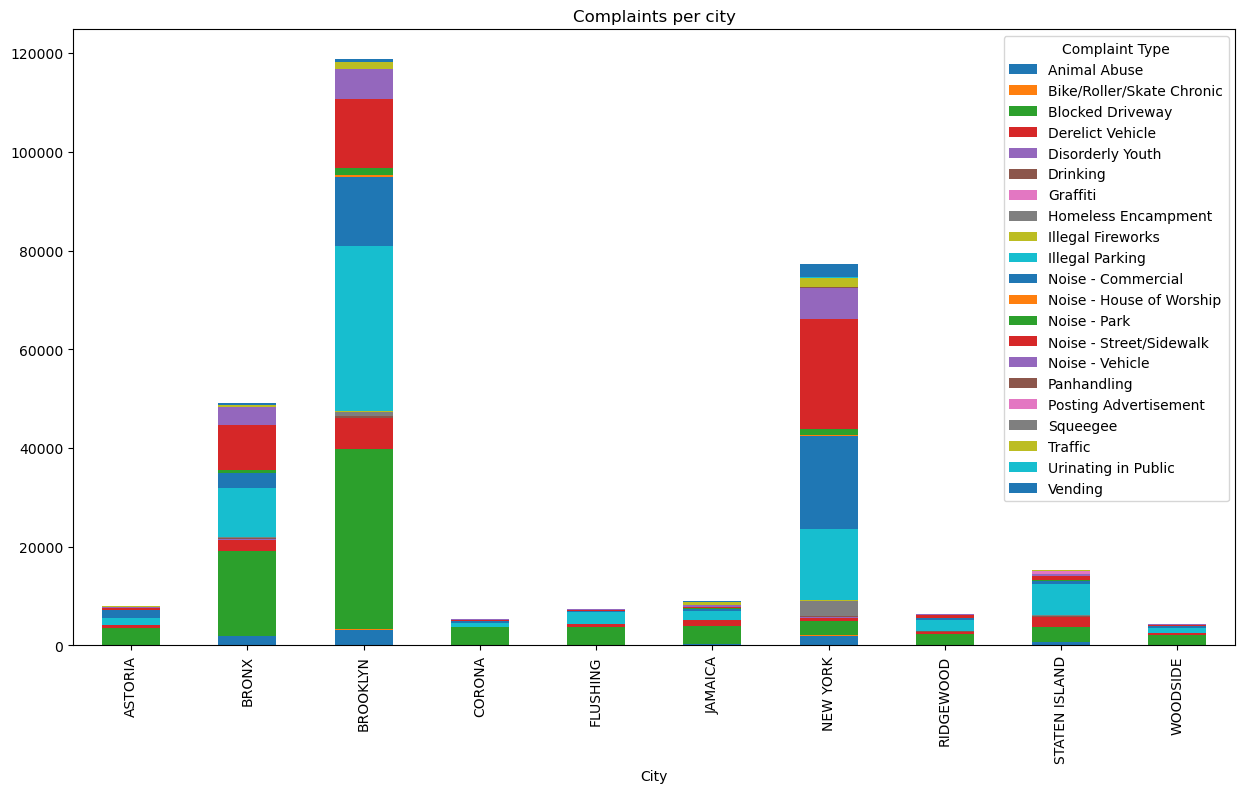

In [32]:
### Stacked Bar chart visualizing category wise complaints per city
topcities.plot(kind='bar', stacked=True, figsize=(15,8), title='Complaints per city') 

In [51]:
cust_service['Created Date'] = pd.to_datetime(cust_service['Created Date'])
cust_service['Closed Date']= pd.to_datetime(cust_service['Closed Date'])

In [54]:
cust_service['Request_Closing_time']= cust_service['Closed Date'].values-cust_service['Created Date'].values

In [55]:
cust_service['Request_closing_time_mins']= cust_service['Request_Closing_time']/np.timedelta64(1,'m')

In [34]:
cust_service.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


##### 5. Check if the average response time across various types of complaints



In [35]:
cust_service['Request Closing Time']= cust_service['Closed Date']- cust_service['Created Date']
cust_service['Request Closing Hours']= cust_service['Request Closing Time'].astype('timedelta64[h]')+1
cust_service[['Request Closing Time','Request Closing Hours']].head(10)

,Request Closing Time,Request Closing Hours
0,0 days 00:55:30,1.0
1,0 days 01:27:13,2.0
2,0 days 04:51:34,5.0
3,0 days 07:45:27,8.0
4,0 days 03:27:44,4.0
5,0 days 01:53:41,2.0
6,0 days 01:58:22,2.0
7,0 days 01:48:49,2.0
8,0 days 08:33:34,9.0
9,0 days 01:23:42,2.0


<Axes: title={'center': 'Avg Response Time of Complaints'}, xlabel='Complaint_Type', ylabel='Average Response Time'>

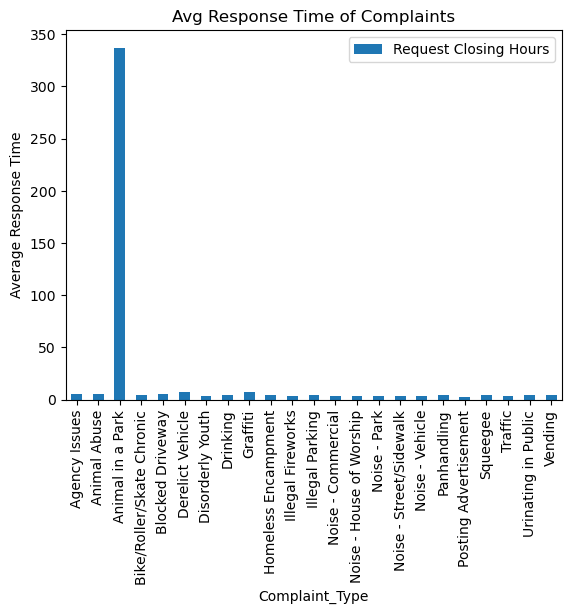

In [36]:
Response_Time= cust_service.groupby(['Complaint Type'])[['Request Closing Hours']].mean()
Response_Time.plot(kind='bar',title='Avg Response Time of Complaints', xlabel='Complaint_Type', ylabel='Average Response Time')

Complaints related to Animal in a park takes longer resolution time than other types of complaints.

In [56]:
Complaints={}
for i in cust_service['Complaint Type'].unique():
    Complaints[i]= np.log(cust_service[cust_service['Complaint Type']==i]['Request_closing_time_mins'])
Complaints

{'Noise - Street/Sidewalk': 0         4.016383
 12        5.010191
 19        3.862833
 38        3.383260
 54        4.502584
             ...   
 364543    5.183841
 364547    3.715197
 364551    3.628333
 364552    4.344887
 364555    2.947067
 Name: Request_closing_time_mins, Length: 51139, dtype: float64,
 'Blocked Driveway': 1         4.468395
 2         5.675269
 7         4.689665
 9         4.427239
 10        6.149892
             ...   
 364548    5.035761
 364549    4.243961
 364550    5.882161
 364556    5.080679
 364557    5.117994
 Name: Request_closing_time_mins, Length: 100624, dtype: float64,
 'Illegal Parking': 3         6.143005
 4         5.336255
 5         4.733417
 6         4.773787
 8         6.241380
             ...   
 364485    5.594711
 364498    6.241185
 364504    3.998812
 364530    4.838396
 364553    6.426138
 Name: Request_closing_time_mins, Length: 91716, dtype: float64,
 'Derelict Vehicle': 14        6.445323
 151       5.468341
 255       4.40529

In [63]:
## Finding p value to check whether average response time for different complaints is same or different.
## Null hypothesis- Average response time for different complaint types is same.
## Alternate hypothesis- Average response time for different complaints types is not same.

from scipy.stats import f_oneway
stat, p= f_oneway(Complaints['Traffic'], Complaints['Drinking'],
Complaints['Animal in a Park'], Complaints['Blocked Driveway'])
if p>0.05:
    print('Null Hypothesis is accepted')
else:
    print('Null Hypothesis is rejected')

Null Hypothesis is rejected
